In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mne

Using data from preloaded Raw for 10 events and 5377 original time points ...
0 bad epochs dropped
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


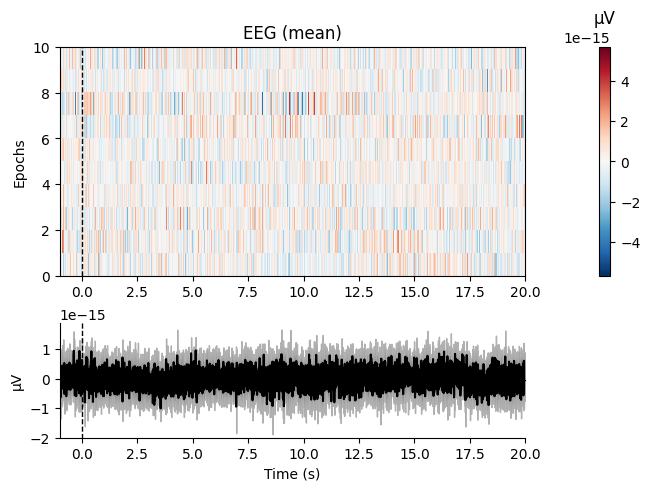

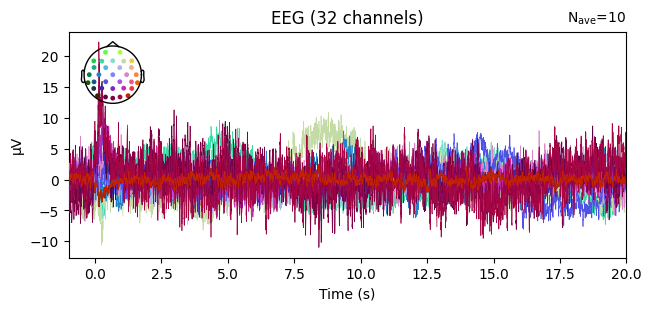

No projector specified for this dataset. Please consider the method self.add_proj.


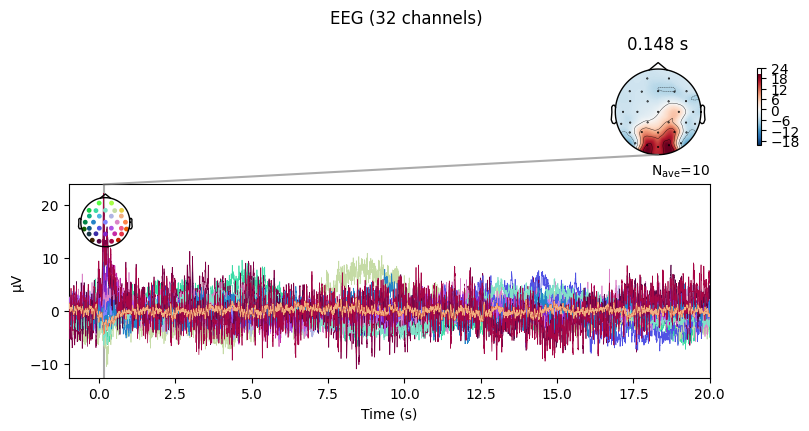

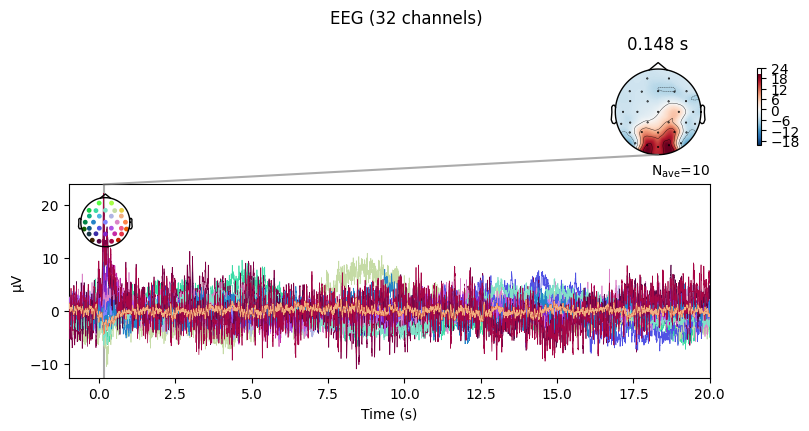

In [2]:
# Load raw data
data_path = mne.datasets.ssvep.data_path()
bids_fname = (
    data_path / "sub-02" / "ses-01" / "eeg" / "sub-02_ses-01_task-ssvep_eeg.vhdr"
)

raw = mne.io.read_raw_brainvision(bids_fname, preload=True, verbose=False)
raw.info["line_freq"] = 50.0

# Set montage
montage = mne.channels.make_standard_montage("easycap-M1")
raw.set_montage(montage, verbose=False)

# Set common average reference
raw.set_eeg_reference("average", projection=False, verbose=False)

# Apply bandpass filter
raw.filter(l_freq=0.1, h_freq=None, fir_design="firwin", verbose=False)

raw = raw.resample(sfreq=256)

# Construct epochs
event_id = {"12hz": 255, "15hz": 155}
events, _ = mne.events_from_annotations(raw, verbose=False)
tmin, tmax = -1, 20  # in s
baseline = None
epochs = mne.Epochs(
    raw,
    events=events,
    event_id=[event_id["12hz"]],
    tmin=tmin,
    tmax=tmax,
    baseline=baseline,
    verbose=False,
)
epochs.plot_image(picks="eeg", combine="mean")
evoked = epochs.average().pick("eeg")
evoked.plot()
#evoked.plot_joint()
evoked.plot_joint(times=0.148)

In [3]:
epochs = mne.Epochs(
    raw,
    events=events,
    event_id=[event_id["12hz"]],
    tmin=0.1,
    tmax=0.2,
    baseline=baseline,
    verbose=False,
)
evoked = epochs.average().pick("eeg")
print(type(evoked))
print(evoked.info)
print(evoked.data.shape)

<class 'mne.evoked.EvokedArray'>
<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 32 EEG
 custom_ref_applied: True
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.1 Hz
 line_freq: 50.0
 lowpass: 128.0 Hz
 meas_date: 2018-09-27 14:48:36 UTC
 nchan: 32
 projs: []
 sfreq: 256.0 Hz
>
(32, 26)


In [5]:
x_somato=np.array(evoked.data)
evoked.save('evoked.fif', overwrite=True)

<ipython-input-5-adead1ef8938>:2: RuntimeWarning: This filename (D:\jupyter_note\SWX_source\evoked.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save('evoked.fif', overwrite=True)


In [20]:
np.save('x_somato.npy', x_somato)